In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
#import numpy as np
#import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from scipy import stats
#from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\admin\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passi

In [2]:
data = pd.read_csv(r'F:\amruth\after_preprocess_data.csv', encoding = 'iso-8859-1')
data.sample(3)

,number_of_rooms,floor_on,total_floors,bedroom,pincode,balkon,terrasse,garten,Gaste-WC,Aufzug,wohung,construction_year,living_area_m2,transform_price
7742,4.0,0,1,3,15732,0,0,1,1,0,0,0,4.875197,8.001561
8530,3.0,4,4,2,13403,1,1,0,0,1,1,2002,4.401339,8.102552
10188,5.0,3,3,4,12307,1,1,0,1,1,1,1906,5.017280,8.294133


In [3]:
X = data.iloc[:, :-1]
y = data[['transform_price']]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.025, random_state = 0)
X_train.shape, y_train.shape, X_test.shape

((12424, 13), (12424, 1), (319, 13))

In [5]:
tf.random.set_seed(12)
model = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis = -1), input_shape = [None]),
    tf.keras.layers.SimpleRNN(60, return_sequences = True),
    tf.keras.layers.SimpleRNN(40, return_sequences = True),
    tf.keras.layers.SimpleRNN(20),
    tf.keras.layers.Dense(1)
])
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epochs: 1e-5 * 10**(epochs / 20))
model.compile(loss = 'mse', optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-5), metrics = ['mae'])

In [6]:
history=model.fit(X_train,y_train, epochs=50, callbacks = [lr_schedule])


Epoch 1/50
12424/12424 [==============================] - 6s 498us/sample - loss: 57.1094 - mae: 7.4982
Epoch 2/50
12424/12424 [==============================] - 5s 388us/sample - loss: 30.8222 - mae: 5.5203
Epoch 3/50
12424/12424 [==============================] - 5s 368us/sample - loss: 21.0542 - mae: 4.5625
Epoch 4/50
12424/12424 [==============================] - 4s 347us/sample - loss: 16.4895 - mae: 4.0388
Epoch 5/50
12424/12424 [==============================] - 5s 376us/sample - loss: 14.1362 - mae: 3.7377
Epoch 6/50
12424/12424 [==============================] - 4s 342us/sample - loss: 12.3960 - mae: 3.4973
Epoch 7/50
12424/12424 [==============================] - 5s 372us/sample - loss: 10.9236 - mae: 3.2799
Epoch 8/50
12424/12424 [==============================] - 4s 358us/sample - loss: 9.5885 - mae: 3.0696
Epoch 9/50
12424/12424 [==============================] - 4s 348us/sample - loss: 8.3323 - mae: 2.8572
Epoch 10/50
12424/12424 [==============================] - 5s 371u

In [7]:
#predictions[:5], y_test.to_numpy()[:5]

In [8]:
#from sklearn.metrics import mean_squared_error, mean_absolute_error
#mean_squared_error(predictions, y_test), mean_absolute_error(predictions, y_test)

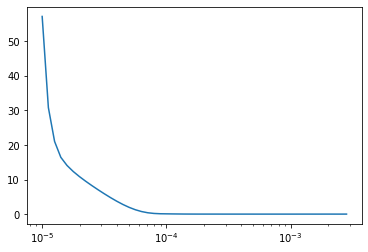

In [9]:
lrs = 1e-5 * (10 ** (np.arange(50) / 20))
plt.semilogx(lrs, history.history["loss"])


In [10]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Lambda(lambda x: tf.expand_dims(x, axis = -1), input_shape = [None]),
    tf.keras.layers.SimpleRNN(60, return_sequences = True),
    tf.keras.layers.SimpleRNN(40, return_sequences = True),
    tf.keras.layers.SimpleRNN(20),
    tf.keras.layers.Dense(1)
])
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epochs: 1e-5 * 10**(epochs / 20))
model1.compile(loss = 'mse', optimizer = tf.keras.optimizers.Adam(learning_rate = 7e-05), metrics = ['mae'])

In [11]:
history=model1.fit(X_train,y_train, epochs=100)


Epoch 1/100
12424/12424 [==============================] - 4s 316us/sample - loss: 22.2391 - mae: 4.5872
Epoch 2/100
12424/12424 [==============================] - 3s 280us/sample - loss: 10.5328 - mae: 3.2143
Epoch 3/100
12424/12424 [==============================] - 4s 320us/sample - loss: 7.0861 - mae: 2.6260
Epoch 4/100
12424/12424 [==============================] - 4s 338us/sample - loss: 4.7368 - mae: 2.1331s - loss:
Epoch 5/100
12424/12424 [==============================] - 4s 352us/sample - loss: 3.0798 - mae: 1.7027
Epoch 6/100
12424/12424 [==============================] - 4s 336us/sample - loss: 1.9275 - mae: 1.3242
Epoch 7/100
12424/12424 [==============================] - 4s 324us/sample - loss: 1.1598 - mae: 1.0008
Epoch 8/100
12424/12424 [==============================] - 4s 341us/sample - loss: 0.6802 - mae: 0.7431
Epoch 9/100
12424/12424 [==============================] - 4s 299us/sample - loss: 0.4058 - mae: 0.5546
Epoch 10/100
12424/12424 [===========================

In [12]:
predictions = model1.predict(X_test)

In [13]:
predictions[:5], y_test.to_numpy()[:5]

(array([[8.545142 ],
        [8.237812 ],
        [8.3565645],
        [7.935999 ],
        [7.757515 ]], dtype=float32),
 array([[8.54500289],
        [8.37047041],
        [8.69484149],
        [7.71760729],
        [7.7403941 ]]))

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(predictions, y_test), mean_absolute_error(predictions, y_test)

(0.08832267721779229, 0.22189556422064344)

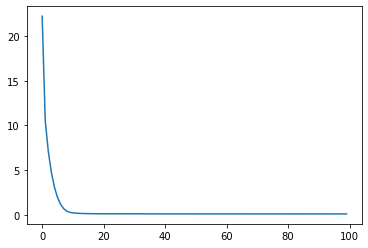

In [15]:
plt.plot(range(0, len(history.history["loss"])), history.history["loss"][0:])

In [18]:
array = []
for i in data.columns[:-1]:
    value = input('Enter the value of {} : '.format(i))
    array.append(value)
str_to_float = [[float(i) for i in array]]
two_dim = str_to_float
sqr_living_m2 = two_dim[-1][-1]


Enter the value of number_of_rooms : 1
Enter the value of floor_on : 23
Enter the value of total_floors : 4
Enter the value of bedroom : 2
Enter the value of pincode : 32
Enter the value of balkon : 3
Enter the value of terrasse : 32
Enter the value of garten : 31
Enter the value of Gaste-WC : 1
Enter the value of Aufzug : 21
Enter the value of wohung : 32
Enter the value of construction_year : 3
Enter the value of living_area_m2 : 21


21.0

In [22]:
two_dim

[[1.0, 23.0, 4.0, 2.0, 32.0, 3.0, 32.0, 31.0, 1.0, 21.0, 32.0, 3.0, 21.0]]

In [23]:
model1.predict([1.0, 23.0, 4.0, 2.0, 32.0, 3.0, 32.0, 31.0, 1.0, 21.0, 32.0, 3.0, 21.0])

array([[2.3155463],
       [1.9558703],
       [2.4588456],
       [2.634372 ],
       [1.9779726],
       [2.5668533],
       [1.9779726],
       [1.9748706],
       [2.3155463],
       [1.9551295],
       [1.9779726],
       [2.5668533],
       [1.9551296]], dtype=float32)

In [16]:
sq_ftt = X_test.head(10)
sqr_ft = sq_ftt['living_area_m2']
p = predictions[:10]
p = p.tolist()
y_test = y_test[:10]

y_t = y_test.to_numpy().tolist()
y_t, p
for i, j, k in zip(y_t, sqr_ft, p):
    print('true_value: ',np.exp(i) * np.exp(j))
    print('predicted_value: ',np.exp(k) * np.exp(j))

true [505103.25009856]
pred [505173.60667137]
true [263377.66665733]
pred [230656.73905724]
true [311023.10593111]
pred [221758.78582427]
true [494466.57537998]
pred [615153.10229396]
true [427684.37845084]
pred [435069.74372139]
true [382740.51652174]
pred [376059.659897]
true [258931.78743056]
pred [366180.03395551]
true [457060.51131931]
pred [305131.01791131]
true [459640.83683441]
pred [538648.10580322]
true [806948.48014018]
pred [607942.32336381]


In [28]:
model1.predict([[2.4,3.4,43.9,35.75,54.3,345.4,52.4,123.5,13.6,13.7,45.8,24.9,2.0]])

array([[2.6218798],
       [2.5233035],
       [2.0127587],
       [1.9896942],
       [2.0347533],
       [2.2186034],
       [2.0313203],
       [2.0969284],
       [1.9973221],
       [1.9959071],
       [2.0173995],
       [1.9586998],
       [2.634372 ]], dtype=float32)